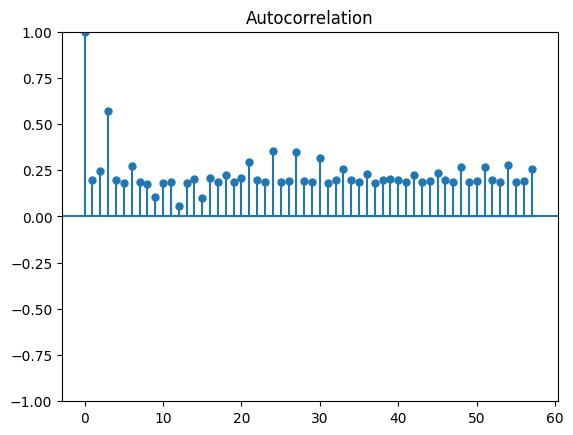

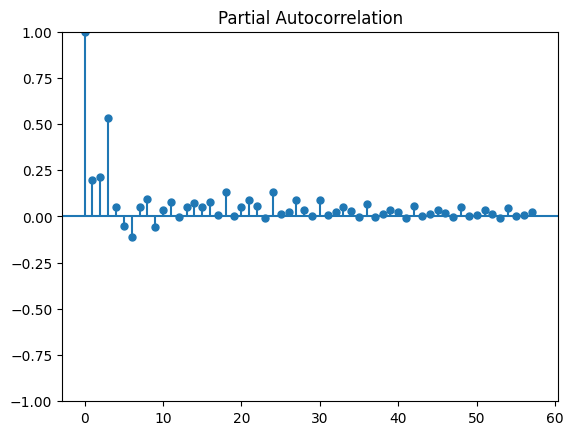

In [ ]:
import pandas as pd
import bike_count
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



data = pd.read_parquet(Path("data") / "train.parquet").reset_index(drop=True)

X = data[['date', 'log_bike_count']].set_index('date', drop=True)

series = X["log_bike_count"]



plot_acf(series)
plot_pacf(series)
plt.show()

In [4]:
from prophet import Prophet
import pandas as pd
import joblib
from pathlib import Path


data = pd.read_parquet(Path("data") / "train.parquet").reset_index(drop=True)
# Charger les données (remplacez par votre propre fichier)
data.to_csv('train.csv')

# Liste unique des compteurs
counter_ids = data['counter_id'].unique()

# Dictionnaire pour stocker les modèles et prédictions
models = {}
predictions = {}

# Période de prédiction (par exemple, 30 jours avec des pas horaires)
future_periods = 30 * 24

# Boucle sur chaque compteur
for counter_id in counter_ids:
    print(f"Processing counter: {counter_id}")
    
    # Filtrer les données pour le compteur actuel
    df_counter = data[data['counter_id'] == counter_id]
    
    # Préparer les données pour Prophet
    df_prophet = df_counter[['date', 'log_bike_count']].rename(columns={'date': 'ds', 'log_bike_count': 'y'})
    
    # Initialiser et entraîner le modèle Prophet
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False  # Ajoutez si nécessaire
    )
    model.fit(df_prophet)
    
    # Stocker le modèle
    models[counter_id] = model
    
    # Créer des dates futures pour prédiction
    future_dates = model.make_future_dataframe(periods=future_periods, freq='H')
    
    # Faire les prédictions
    forecast = model.predict(future_dates)
    
    # Stocker les prédictions
    predictions[counter_id] = forecast

joblib.dump(models, 'models.pkl')


# Exemple : Accéder aux prédictions d'un compteur spécifique
counter_to_check = counter_ids[0]
print(predictions[counter_to_check][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


Processing counter: 100007049-102007049


22:02:16 - cmdstanpy - INFO - Chain [1] start processing
22:02:18 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100007049-101007049


22:02:22 - cmdstanpy - INFO - Chain [1] start processing
22:02:25 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100036718-104036718


22:02:29 - cmdstanpy - INFO - Chain [1] start processing
22:02:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100036718-103036718


22:02:34 - cmdstanpy - INFO - Chain [1] start processing
22:02:36 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100036719-104036719


22:02:39 - cmdstanpy - INFO - Chain [1] start processing
22:02:40 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100036719-103036719


22:02:44 - cmdstanpy - INFO - Chain [1] start processing
22:02:47 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100042374-110042374


22:02:50 - cmdstanpy - INFO - Chain [1] start processing
22:02:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100042374-109042374


22:02:55 - cmdstanpy - INFO - Chain [1] start processing
22:02:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100044493-SC


22:03:02 - cmdstanpy - INFO - Chain [1] start processing
22:03:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100047542-103047542


22:03:07 - cmdstanpy - INFO - Chain [1] start processing
22:03:08 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100047542-104047542


22:03:12 - cmdstanpy - INFO - Chain [1] start processing
22:03:15 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100047545-103047545


22:03:18 - cmdstanpy - INFO - Chain [1] start processing
22:03:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100047545-104047545


22:03:25 - cmdstanpy - INFO - Chain [1] start processing
22:03:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100047546-104047546


22:03:30 - cmdstanpy - INFO - Chain [1] start processing
22:03:33 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100047546-103047546


22:03:35 - cmdstanpy - INFO - Chain [1] start processing
22:03:38 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100047547-104047547


22:03:42 - cmdstanpy - INFO - Chain [1] start processing
22:03:44 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100047547-103047547


22:03:47 - cmdstanpy - INFO - Chain [1] start processing
22:03:48 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100047548-103047548


22:03:51 - cmdstanpy - INFO - Chain [1] start processing
22:03:54 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100047548-104047548


22:03:57 - cmdstanpy - INFO - Chain [1] start processing
22:03:59 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100049407-353255860


22:04:03 - cmdstanpy - INFO - Chain [1] start processing
22:04:06 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100049407-353255859


22:04:09 - cmdstanpy - INFO - Chain [1] start processing
22:04:12 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100050876-103050876


22:04:15 - cmdstanpy - INFO - Chain [1] start processing
22:04:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100050876-104050876


22:04:20 - cmdstanpy - INFO - Chain [1] start processing
22:04:22 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056046-SC


22:04:25 - cmdstanpy - INFO - Chain [1] start processing
22:04:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056047-SC


22:04:31 - cmdstanpy - INFO - Chain [1] start processing
22:04:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056223-SC


22:04:35 - cmdstanpy - INFO - Chain [1] start processing
22:04:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056226-104056226


22:04:41 - cmdstanpy - INFO - Chain [1] start processing
22:04:44 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056226-103056226


22:04:48 - cmdstanpy - INFO - Chain [1] start processing
22:04:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056327-103056327


22:04:58 - cmdstanpy - INFO - Chain [1] start processing
22:05:01 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056327-104056327


22:05:08 - cmdstanpy - INFO - Chain [1] start processing
22:05:10 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056329-104056329


22:05:17 - cmdstanpy - INFO - Chain [1] start processing
22:05:19 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056329-103056329


22:05:26 - cmdstanpy - INFO - Chain [1] start processing
22:05:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056330-104056330


22:05:35 - cmdstanpy - INFO - Chain [1] start processing
22:05:37 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056330-103056330


22:05:44 - cmdstanpy - INFO - Chain [1] start processing
22:05:46 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056331-104056331


22:05:51 - cmdstanpy - INFO - Chain [1] start processing
22:05:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056331-103056331


22:05:56 - cmdstanpy - INFO - Chain [1] start processing
22:05:58 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056332-103056332


22:06:02 - cmdstanpy - INFO - Chain [1] start processing
22:06:04 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056332-104056332


22:06:07 - cmdstanpy - INFO - Chain [1] start processing
22:06:08 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056334-103056334


22:06:11 - cmdstanpy - INFO - Chain [1] start processing
22:06:14 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056334-104056334


22:06:17 - cmdstanpy - INFO - Chain [1] start processing
22:06:19 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056335-104056335


22:06:22 - cmdstanpy - INFO - Chain [1] start processing
22:06:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056335-103056335


22:06:28 - cmdstanpy - INFO - Chain [1] start processing
22:06:30 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056336-106056336


22:06:34 - cmdstanpy - INFO - Chain [1] start processing
22:06:35 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100056336-105056336


22:06:39 - cmdstanpy - INFO - Chain [1] start processing
22:06:41 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100057329-104057329


22:06:44 - cmdstanpy - INFO - Chain [1] start processing
22:06:46 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100057329-103057329


22:06:50 - cmdstanpy - INFO - Chain [1] start processing
22:06:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100057380-104057380


22:06:55 - cmdstanpy - INFO - Chain [1] start processing
22:06:58 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100057380-103057380


22:07:01 - cmdstanpy - INFO - Chain [1] start processing
22:07:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100057445-103057445


22:07:07 - cmdstanpy - INFO - Chain [1] start processing
22:07:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100057445-104057445


22:07:12 - cmdstanpy - INFO - Chain [1] start processing
22:07:15 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100060178-102060178


22:07:18 - cmdstanpy - INFO - Chain [1] start processing
22:07:20 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100060178-101060178


22:07:24 - cmdstanpy - INFO - Chain [1] start processing
22:07:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100063175-353277233


22:07:30 - cmdstanpy - INFO - Chain [1] start processing
22:07:34 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 100063175-353277235


22:07:37 - cmdstanpy - INFO - Chain [1] start processing
22:07:39 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 300014702-353245972


22:07:42 - cmdstanpy - INFO - Chain [1] start processing
22:07:42 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Processing counter: 300014702-353245971


22:07:45 - cmdstanpy - INFO - Chain [1] start processing
22:07:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


                   ds      yhat  yhat_lower  yhat_upper
0 2020-09-01 01:00:00 -1.301642   -2.261092   -0.259362
1 2020-09-01 02:00:00 -1.351951   -2.277293   -0.428149
2 2020-09-01 03:00:00 -1.389081   -2.331649   -0.364920
3 2020-09-01 04:00:00 -1.412863   -2.408387   -0.441148
4 2020-09-01 05:00:00 -1.423277   -2.393699   -0.497429


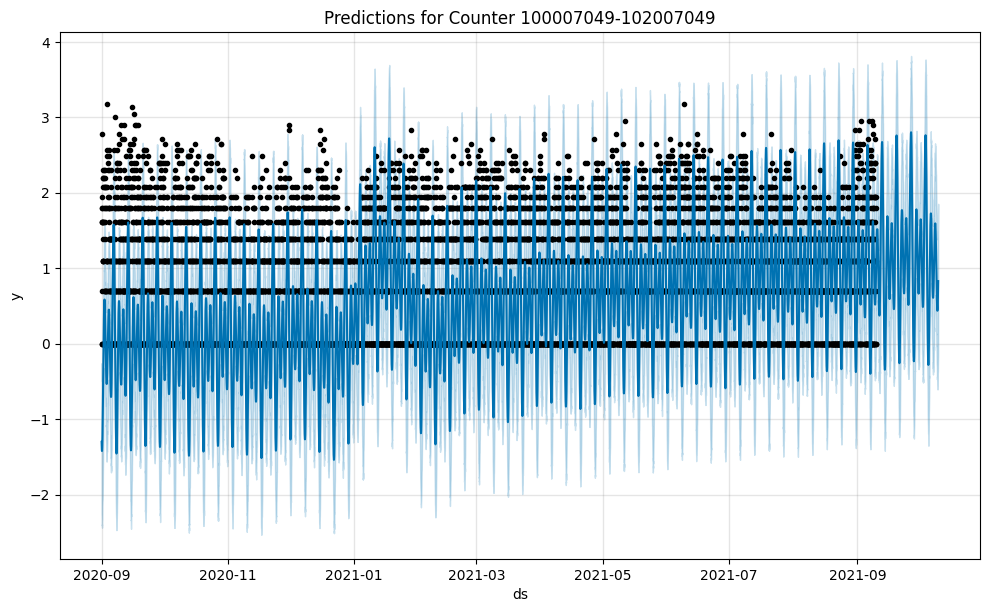

In [5]:
import matplotlib.pyplot as plt

# Visualiser les prédictions pour un compteur spécifique
forecast = predictions[counter_to_check]
fig = models[counter_to_check].plot(forecast)
plt.title(f"Predictions for Counter {counter_to_check}")
plt.show()


In [7]:
import pandas as pd
from prophet import Prophet

# Charger les modèles précédemment entraînés
# (Supposons que vous avez enregistré les modèles dans un fichier, sinon utilisez un dict directement)
import joblib
models = joblib.load('models.pkl')  # Dictionnaire {counter_id: Prophet model}

# Charger le dataset de test

test_data = pd.read_parquet('data/final_test.parquet')
test_data.to_csv('data/final_test.csv')
# Initialiser une liste pour stocker les prédictions
predictions = []

# Boucler sur les lignes du dataset de test
for _, row in test_data.iterrows():
    counter_id = row['counter_id']
    date = row['date']
    
    # Vérifier si le modèle pour ce compteur existe
    if counter_id in models:
        model = models[counter_id]
        
        # Créer un DataFrame pour la date à prédire
        future_df = pd.DataFrame({'ds': [date]})
        
        # Faire la prédiction
        forecast = model.predict(future_df)
        predicted_value = forecast['yhat'].iloc[0]
    else:
        # Si aucun modèle n'est trouvé pour le compteur, gérer le cas (par exemple, NaN ou une valeur par défaut)
        predicted_value = None

    # Ajouter la prédiction à la liste
    predictions.append(predicted_value)

# Ajouter les prédictions au DataFrame
test_data['log_bike_count'] = predictions

# Sauvegarder les prédictions dans un fichier CSV pour soumission
submission = test_data[['counter_id', 'date', 'log_bike_count']]
submission.to_csv('submission.csv', index=False)


In [9]:

submission['Id'] = submission.index

submission = submission[['Id', 'log_bike_count']]

# Sauvegarder le fichier de soumission
submission.to_csv('submission.csv', index=False)

print(submission.head())


   Id  log_bike_count
0   0        1.052382
1   1        1.515753
2   2        1.449634
3   3        1.371316
4   4        1.207995


C:\Users\diane\AppData\Local\Temp\ipykernel_13812\2119970345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Id'] = submission.index


In [10]:
len(submission)

51440

In [11]:
import numpy as np
submission['log_bike_count'] = np.maximum(submission['log_bike_count'], 0)


In [12]:
submission.to_csv('submission.csv', index=False)
